In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
from scipy.special import jv

In [2]:
with open('../params/so_nominal.yml') as f:
    bands = yaml.load(f, yaml.Loader)['bands']

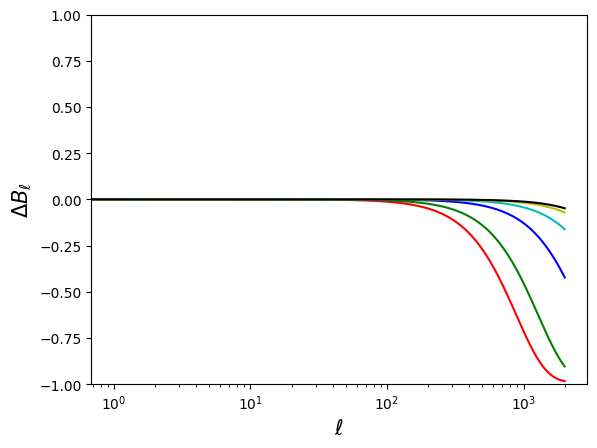

In [3]:
band_names = ['LF1', 'LF2', 'MF1', 'MF2', 'UHF1', 'UHF2']

# Ells at which the beams will be sampled
ell = np.unique(np.geomspace(1E-3, 2000, 2048).astype(int))

# Unperturbed Gaussian beams
beams_0 = {}
for bn in band_names:
    sigma_rad = np.radians(bands[bn]['beam']/60)/2.355
    beams_0[bn] = np.exp(-0.5*ell*(ell+1)*sigma_rad**2)

# Perturbed Gaussian beams (just change FWHM by 1%)
pert_FWHM = 0.01
beams_1 = {}
for bn in band_names:
    sigma_rad = (1+pert_FWHM)*np.radians(bands[bn]['beam']/60)/2.355
    beams_1[bn] = np.exp(-0.5*ell*(ell+1)*sigma_rad**2)

# Generate perturbation and write to file
def softmax(x, xmax):
    return x/(1+np.fabs(x/xmax))

perts = {}
for bn, col in zip(band_names, ['r', 'g', 'b', 'c', 'y', 'k']):
    perts[bn] = softmax(beams_1[bn]/beams_0[bn]-1, 100)
    if np.any(np.isnan(perts[bn])):
        print("Div by zero!!")
    plt.plot(ell, perts[bn], col+'-')
plt.ylim([-1, 1])
plt.xlabel('')
plt.xscale('log')
plt.xlabel(r'$\ell$', fontsize=15)
plt.ylabel(r'$\Delta B_\ell$', fontsize=15)

for bn in band_names:
    np.savetxt(f'delta_beam_{bn}_FWHM0p01.txt', np.transpose([ell, perts[bn]]))